In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORT MAD-X survey file

# Check how many skiprows from BASISONE file 
data=pd.read_csv('survey.out',comment='#',sep='\s+',skiprows=6,engine='python')

data_clean=data.shift(periods=1, axis='columns').drop([0]).drop(['*'],axis=1)
data_clean[["S", "L","ANGLE","X","Y","Z","THETA","PHI","PSI"]] = data_clean[["S", "L","ANGLE","X","Y","Z","THETA","PHI","PSI"]].apply(pd.to_numeric)

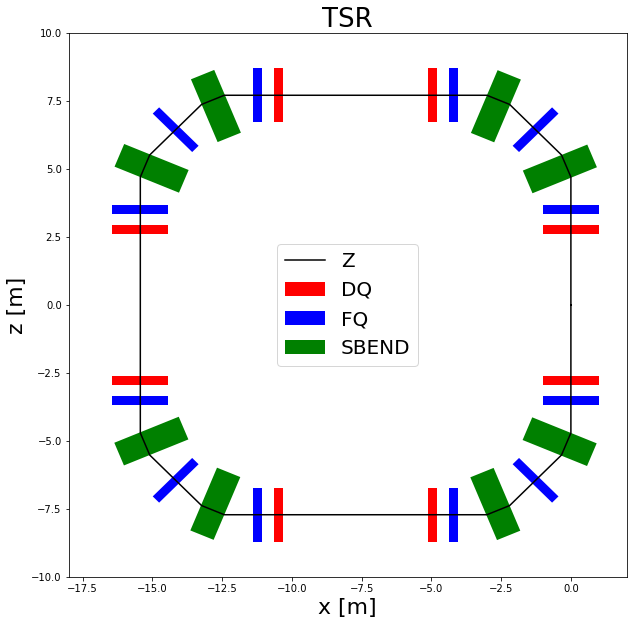

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,10),facecolor='white')

plt.plot(data_clean['X'],data_clean['Z'],c='black')

edge=22.5
qfleg=False
qdleg=False
sbendleg=False

for index,row in data_clean.iterrows():
    if row['KEYWORD']=='"QUADRUPOLE"':
        if row['NAME'][2]=='D':
            colo='red'
            lab='DQ'
        if row['NAME'][2]=='F':
            colo='blue'
            lab='FQ'
        
        rectangle1 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=-row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+90), fc=colo,
                                  label=lab if (qdleg==0 or qfleg==0) else "")
        
        rectangle2 = plt.Rectangle(xy=(row['X'], row['Z']), 
                                  width=row['L'], height=1, 
                                  angle=(-row['THETA']*180/np.pi+270), fc=colo)
        
        ax.add_patch(rectangle1)
        ax.add_patch(rectangle2)

        if row['NAME'][2]=='D':
            qdleg=True
        if row['NAME'][2]=='F':
            qfleg=True
        
    if row['KEYWORD']=='"SBEND"':
        rectangle1 = plt.Rectangle(xy=(row['X'], row['Z']), width=-row['L'], height=1.5, 
                                  angle=-rowbef['THETA']*180/np.pi+90+edge, fc='green',
                                   label='SBEND' if sbendleg==0 else '')
        
        rectangle2 = plt.Rectangle(xy=(row['X'], row['Z']), width=row['L'], height=1, 
                                  angle=-rowbef['THETA']*180/np.pi+270+edge, fc='green')
        
        ax.add_patch(rectangle1)
        ax.add_patch(rectangle2)
        
        sbendleg=True
    
    rowbef=row

ax.set_title('TSR',fontsize=26)
ax.set_xlabel('x [m]',fontsize=22)
ax.set_ylabel('z [m]',fontsize=22)
ax.set_xlim(-18,2) 
ax.set_ylim(-10,10) 
ax.legend(fontsize=20)
plt.savefig('TSR_LAYOUT1.pdf')
plt.show()
plt.close()

In [63]:
data_clean['NAME'][3][2]

1     "TSR$START"
2       "DRIFT_0"
3          "QD11"
4       "DRIFT_1"
5          "QF11"
6       "DRIFT_2"
7          "AM11"
8       "DRIFT_3"
9          "QF12"
10      "DRIFT_4"
11         "AM12"
12      "DRIFT_5"
13         "QF13"
14      "DRIFT_6"
15         "QD12"
16      "DRIFT_7"
17         "QD21"
18      "DRIFT_8"
19         "QF21"
20      "DRIFT_9"
21         "AM21"
22     "DRIFT_10"
23         "QF22"
24     "DRIFT_11"
25         "AM22"
26     "DRIFT_12"
27         "QF23"
28     "DRIFT_13"
29         "QD22"
30     "DRIFT_14"
31         "QD31"
32     "DRIFT_15"
33         "QF31"
34     "DRIFT_16"
35         "AM31"
36     "DRIFT_17"
37         "QF32"
38     "DRIFT_18"
39         "AM32"
40     "DRIFT_19"
41         "QF33"
42     "DRIFT_20"
43         "QD32"
44     "DRIFT_21"
45         "QD41"
46     "DRIFT_22"
47         "QF41"
48     "DRIFT_23"
49         "AM41"
50     "DRIFT_24"
51         "QF42"
52     "DRIFT_25"
53         "AM42"
54     "DRIFT_26"
55         "QF43"
56     "DR

In [31]:
for index,row in data_clean.iterrows():
    print(row['L'])

0.0
2.6
0.325
0.435
0.325
1.021792112
0.9032078879000001
1.1525
0.325
1.1525
0.9032078879000001
1.021792112
0.325
0.435
0.325
5.2
0.325
0.435
0.325
1.021792112
0.9032078879000001
1.1525
0.325
1.1525
0.9032078879000001
1.021792112
0.325
0.435
0.325
5.2
0.325
0.435
0.325
1.021792112
0.9032078879000001
1.1525
0.325
1.1525
0.9032078879000001
1.021792112
0.325
0.435
0.325
5.2
0.325
0.435
0.325
1.021792112
0.9032078879000001
1.1525
0.325
1.1525
0.9032078879000001
1.021792112
0.325
0.435
0.325
2.6
0.0
